## CAPSTONE PROJECT

### DATA WRANGLING and CLEANING

In [2]:
import pandas as pd
import numpy as np

### Import Raw Crime Data


In [3]:
#QCPD Station 10 file 2016
crime1 = pd.read_excel('QCPDStation10_2016.xlsx', sheet_name='Detailed_Report')

#QCPD Station 10 file 2017-2018
crime2 = pd.read_excel('QCPDStation10_2017-2018.xlsx', sheet_name='Detailed_Report')

In [4]:
crime1.head()

,barangay,street,date_committed,time_committed,offense,crime_category
0,Obrero,SCOUT OJEDA ST.,2016-01-01,04:00:00,THEFT,PROPERTY
1,Roxas,HYACINTH ST.,2016-01-01,15:30:00,THEFT,PROPERTY
2,Sacred Heart,SCOUT TORILLO ST.,2016-01-02,00:00:00,ROBBERY,PROPERTY
3,Sacred Heart,NaN,2016-01-03,00:30:00,THEFT,PROPERTY
4,South Triangle,MOTHER IGNACIA AVE.,2016-01-04,00:00:00,PHYSICAL INJURIES,PERSONS


In [5]:
crime1.describe()

,barangay,street,date_committed,time_committed,offense,crime_category
count,759,732,759,759,759,759
unique,11,112,323,161,8,3
top,South Triangle,EDSA,2016-12-10 00:00:00,00:00:00,THEFT,PROPERTY
freq,185,82,7,135,333,464
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2016-12-31 00:00:00,NaN,NaN,NaN


In [6]:
crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 6 columns):
barangay          759 non-null object
street            732 non-null object
date_committed    759 non-null datetime64[ns]
time_committed    759 non-null object
offense           759 non-null object
crime_category    759 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 35.6+ KB


In [7]:
barangays = crime1.barangay.unique()
pd.DataFrame(barangays, columns=["Barangays"])

,Barangays
0,Obrero
1,Roxas
2,Sacred Heart
3,South Triangle
4,Pinyahan
5,Central
6,Kamuning
7,Paligsahan
8,Laging Handa
9,Immaculate Concepcion


In [8]:
offense = crime1.offense.unique()
pd.DataFrame(offense, columns=["Types of Offenses"])

,Types of Offenses
0,THEFT
1,ROBBERY
2,PHYSICAL INJURIES
3,MOTORNAPPING
4,CARNAPPING
5,HOMICIDE
6,RAPE
7,MURDER


In [9]:
crime2.head(10)

,barangay,street,date_committed,time_committed,stages_of_felony,offense,offense_category,crime_category
0,Kamuning,K-5TH ST.,2017-01-01,04:00:00,FRUSTRATED,PHYSICAL INJURIES,NaN,PERSONS
1,Central,EAST AVE.,2017-01-04,14:05:00,CONSUMATED,PHYSICAL INJURIES,NaN,PERSONS
2,Central,ELLIPTICAL RD.,2017-01-05,00:00:00,CONSUMATED,THEFT,NaN,PROPERTY
3,Central,ELLIPTICAL RD.,2017-01-05,19:00:00,CONSUMATED,ROBBERY,NaN,PROPERTY
4,Pinyahan,EDSA,2017-01-08,15:00:00,CONSUMATED,ROBBERY,NaN,PROPERTY
5,Pinyahan,EAST AVE.,2017-01-05,13:30:00,CONSUMATED,ROBBERY,NaN,PROPERTY
6,South Triangle,PANAY AVE.,2017-01-09,03:40:00,CONSUMATED,PHYSICAL INJURIES,NaN,PERSONS
7,Pinyahan,MAGALANG ST.,2017-01-11,00:00:00,ATTEMPTED,PHYSICAL INJURIES,NaN,PERSONS
8,Paligsahan,TIMOG AVE.,2017-01-11,18:30:00,CONSUMATED,THEFT,NaN,PROPERTY
9,Sacred Heart,TOMAS MORATO AVE.,2017-01-13,03:00:00,CONSUMATED,PHYSICAL INJURIES,NaN,PERSONS


In [10]:
crime2.describe()

,barangay,street,date_committed,time_committed,stages_of_felony,offense,offense_category,crime_category
count,1029,931,1029,1029,1029,1029,41,1029
unique,11,118,532,207,4,8,6,3
top,South Triangle,EDSA,2018-06-27 00:00:00,00:00:00,CONSUMATED,THEFT,Rape in Relation to 7610,PROPERTY
freq,218,117,7,186,972,442,16,646
first,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN


In [11]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 8 columns):
barangay            1029 non-null object
street              931 non-null object
date_committed      1029 non-null datetime64[ns]
time_committed      1029 non-null object
stages_of_felony    1029 non-null object
offense             1029 non-null object
offense_category    41 non-null object
crime_category      1029 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 64.4+ KB


### Rename Offense Types

In [12]:
offense = crime2.offense.unique()
pd.DataFrame(offense, columns=["Types of Offenses"])

,Types of Offenses
0,PHYSICAL INJURIES
1,THEFT
2,ROBBERY
3,ANTI-CARNAPPING ACT (R.A. 6539) MC
4,ANTI-CARNAPPING ACT (R.A. 6539) MV
5,MURDER
6,RAPE (Art. 266-A RC & R.A.8353)
7,HOMICIDE


In [13]:
offense = crime1.offense.unique()
pd.DataFrame(offense, columns=["Types of Offenses"])

,Types of Offenses
0,THEFT
1,ROBBERY
2,PHYSICAL INJURIES
3,MOTORNAPPING
4,CARNAPPING
5,HOMICIDE
6,RAPE
7,MURDER


In [16]:
rename2 = crime2.replace({'ANTI-CARNAPPING ACT (R.A. 6539) MC': 'CARNAPPING', 
                         'RAPE (Art. 266-A RC & R.A.8353)': 'RAPE',
                         'ANTI-CARNAPPING ACT (R.A. 6539) MV': 'MOTORNAPPING'})

In [15]:
rename1 = crime1.replace({'CARNAPPING ': 'CARNAPPING', 
                         'RAPE ': 'RAPE',
                         'MOTORNAPPING ': 'MOTORNAPPING'})

In [18]:
rename1.offense.unique()

array([u'THEFT', u'ROBBERY', u'PHYSICAL INJURIES', 'MOTORNAPPING',
       'CARNAPPING', u'HOMICIDE', 'RAPE', u'MURDER'], dtype=object)

In [19]:
rename2.offense.unique()

array([u'PHYSICAL INJURIES', u'THEFT', u'ROBBERY', 'CARNAPPING',
       'MOTORNAPPING', u'MURDER', 'RAPE', u'HOMICIDE'], dtype=object)

### DROP COLUMNS in CRIME2

In [20]:
rename2drop = rename2.drop(["stages_of_felony", "offense_category"], axis=1)

In [21]:
rename2drop.head()

,barangay,street,date_committed,time_committed,offense,crime_category
0,Kamuning,K-5TH ST.,2017-01-01,04:00:00,PHYSICAL INJURIES,PERSONS
1,Central,EAST AVE.,2017-01-04,14:05:00,PHYSICAL INJURIES,PERSONS
2,Central,ELLIPTICAL RD.,2017-01-05,00:00:00,THEFT,PROPERTY
3,Central,ELLIPTICAL RD.,2017-01-05,19:00:00,ROBBERY,PROPERTY
4,Pinyahan,EDSA,2017-01-08,15:00:00,ROBBERY,PROPERTY


In [22]:
rename2drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 6 columns):
barangay          1029 non-null object
street            931 non-null object
date_committed    1029 non-null datetime64[ns]
time_committed    1029 non-null object
offense           1029 non-null object
crime_category    1029 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 48.3+ KB


### COMBINE TWO DATAFRAMES (crime1 & crime2new)

In [23]:
crimedata = pd.concat([rename2drop, rename1])

In [24]:
offense = crimedata.offense.unique()
pd.DataFrame(offense, columns=["Types of Offenses"])

,Types of Offenses
0,PHYSICAL INJURIES
1,THEFT
2,ROBBERY
3,CARNAPPING
4,MOTORNAPPING
5,MURDER
6,RAPE
7,HOMICIDE


In [25]:
barangay = crimedata.barangay.unique()
pd.DataFrame(barangay, columns=["Barangays"])

,Barangays
0,Kamuning
1,Central
2,Pinyahan
3,South Triangle
4,Paligsahan
5,Sacred Heart
6,Roxas
7,Pinagkaisahan
8,Obrero
9,Immaculate Concepcion


In [26]:
crime_categ = crimedata.crime_category.unique()
pd.DataFrame(crime_categ, columns=["Types of Offenses"])

,Types of Offenses
0,PERSONS
1,PROPERTY
2,SPECIAL LAWS


In [27]:
st_rename = crimedata.replace({'BIR ROAD': 'BIR RD.', 
                         'SCOUT BAYORAN ST': 'SCOUT BAYORAN ST.',
                         'SCOUT CHUATOCO ST': 'SCOUT CHUATOCO ST.',
                         'MOTHER IGNACIA AVE': 'MOTHER IGNACIA AVE.'})

In [28]:
street = st_rename.street.unique()
table_street = pd.DataFrame(street, columns=["Streets"])
table_street['Streets'].sort_values()

63              11TH JAMBOREE ST.
36                   AURORA BLVD.
94                     AZUCENA ST
122                   BEGONIA ST.
115         BETTY GO-BELMONTE ST.
22                        BIR RD.
104                    BOSTON ST.
128            CADENA DE AMOR ST.
96                    CHICAGO ST.
127                    DAHLIA ST.
99                     DENVER ST.
92                    DETROIT ST.
84             DOCTOR LAZCANO ST.
35              DON A. ROCES AVE.
79           DON ALFREDO EGEA ST.
1                       EAST AVE.
3                            EDSA
2                  ELLIPTICAL RD.
87              ERMIN GARCIA AVE.
44               ERMIN GARCIA ST.
97            EUGENIO LOPEZ DRIVE
33     EULOGIO RODRIGUEZ SR. AVE.
74                EVERLASTING ST.
65            FATHER MARTINEZ ST.
45               FELIX MANALO ST.
82                   GLADIOLA ST.
41                   GUMAMELA ST.
77                  HILLCREST ST.
118                  HYACINTH ST.
88            

### Remove Null Values

In [29]:
st_rename.isnull().sum()

barangay            0
street            125
date_committed      0
time_committed      0
offense             0
crime_category      0
dtype: int64

In [30]:
crimeClean = st_rename.dropna()

In [31]:
crimeClean.describe()

,barangay,street,date_committed,time_committed,offense,crime_category
count,1663,1663,1663,1663,1663,1663
unique,11,131,825,250,8,3
top,South Triangle,EDSA,2016-04-28 00:00:00,00:00:00,THEFT,PROPERTY
freq,395,199,7,299,723,1040
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN


In [32]:
crimeClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 758
Data columns (total 6 columns):
barangay          1663 non-null object
street            1663 non-null object
date_committed    1663 non-null datetime64[ns]
time_committed    1663 non-null object
offense           1663 non-null object
crime_category    1663 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 90.9+ KB


### Correct Datatypes

In [33]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

In [35]:
crimeClean.shape

(1663, 6)

In [36]:
crimeClean.describe(include='all')

,barangay,street,date_committed,time_committed,offense,crime_category
count,1663,1663,1663,1663,1663,1663
unique,11,131,825,250,8,3
top,South Triangle,EDSA,2016-04-28 00:00:00,1900-01-01 00:00:00,THEFT,PROPERTY
freq,395,199,7,299,723,1040
first,NaN,NaN,2016-01-01 00:00:00,1900-01-01 00:00:00,NaN,NaN
last,NaN,NaN,2018-12-31 00:00:00,1900-01-01 23:56:00,NaN,NaN


##  Check Duplicates

In [37]:
print('Duplicates: {}'.format(crimeClean.duplicated().sum()))  #Check if ID is duplicated

Duplicates: 2


In [38]:
crimereport = crimeClean.drop_duplicates(subset=None, keep='first')

In [39]:
crimereport.duplicated().sum()

0

In [40]:
crimereport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661 entries, 0 to 758
Data columns (total 6 columns):
barangay          1661 non-null object
street            1661 non-null object
date_committed    1661 non-null datetime64[ns]
time_committed    1661 non-null datetime64[ns]
offense           1661 non-null object
crime_category    1661 non-null object
dtypes: datetime64[ns](2), object(4)
memory usage: 90.8+ KB


In [41]:
crimereport.to_excel('CrimeReportClean.xlsx')

## Feature Engineering

#### YEAR

In [42]:
crimereport['year'] = crimereport['date_committed'].dt.year

#### MONTH

In [82]:
crimereport['month'] = crimereport['date_committed'].dt.month

##### DAY_OF_WEEK

In [44]:
crimereport['day_of_week'] = crimereport['date_committed'].dt.dayofweek

#### HOUR / PART_OF_DAY

In [45]:
crimereport['hour']=crimereport['time_committed'].dt.hour

In [77]:
crimereport['minute']=crimereport['time_committed'].dt.minute

#### IS_WEEKEND

In [46]:
weekno = crimereport['day_of_week']
crimereport['is_weekend']=np.where(weekno>5, 'Yes', 'No')

In [83]:
crimereport.head(20)

,barangay,street,date_committed,time_committed,offense,crime_category,year,month,day_of_week,hour,is_weekend,minute
0,Kamuning,K-5TH ST.,2017-01-01,1900-01-01 04:00:00,PHYSICAL INJURIES,PERSONS,2017,1,6,0,Yes,0
1,Central,EAST AVE.,2017-01-04,1900-01-01 14:05:00,PHYSICAL INJURIES,PERSONS,2017,1,2,5,No,5
2,Central,ELLIPTICAL RD.,2017-01-05,1900-01-01 00:00:00,THEFT,PROPERTY,2017,1,3,0,No,0
3,Central,ELLIPTICAL RD.,2017-01-05,1900-01-01 19:00:00,ROBBERY,PROPERTY,2017,1,3,0,No,0
4,Pinyahan,EDSA,2017-01-08,1900-01-01 15:00:00,ROBBERY,PROPERTY,2017,1,6,0,Yes,0
5,Pinyahan,EAST AVE.,2017-01-05,1900-01-01 13:30:00,ROBBERY,PROPERTY,2017,1,3,30,No,30
6,South Triangle,PANAY AVE.,2017-01-09,1900-01-01 03:40:00,PHYSICAL INJURIES,PERSONS,2017,1,0,40,No,40
7,Pinyahan,MAGALANG ST.,2017-01-11,1900-01-01 00:00:00,PHYSICAL INJURIES,PERSONS,2017,1,2,0,No,0
8,Paligsahan,TIMOG AVE.,2017-01-11,1900-01-01 18:30:00,THEFT,PROPERTY,2017,1,2,30,No,30
9,Sacred Heart,TOMAS MORATO AVE.,2017-01-13,1900-01-01 03:00:00,PHYSICAL INJURIES,PERSONS,2017,1,4,0,No,0


In [85]:
crimereport.to_excel('CrimeReport.xlsx')

## Exploratory Data Analysis

<Figure size 720x360 with 0 Axes>

Text(0.5,1,'No. of Incidents by Type of Offense')

Text(0,0.5,'Types of Offenses')

Text(0.5,0,'Number of Incidents')

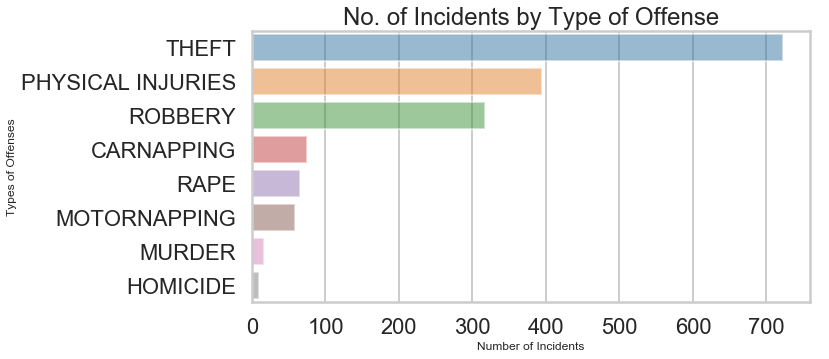

In [276]:
offense  = crimereport['offense'].value_counts()
offense = offense[:8,]
plt.figure(figsize=(10,5))
ax = sns.barplot(offense.values, offense.index, alpha=0.5)
plt.title('No. of Incidents by Type of Offense')
plt.ylabel('Types of Offenses', fontsize=12)
plt.xlabel('Number of Incidents', fontsize=12)
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5,1,'Number of Incidents by Barangay')

Text(0,0.5,'Barangay')

Text(0.5,0,'Number of Incidents')

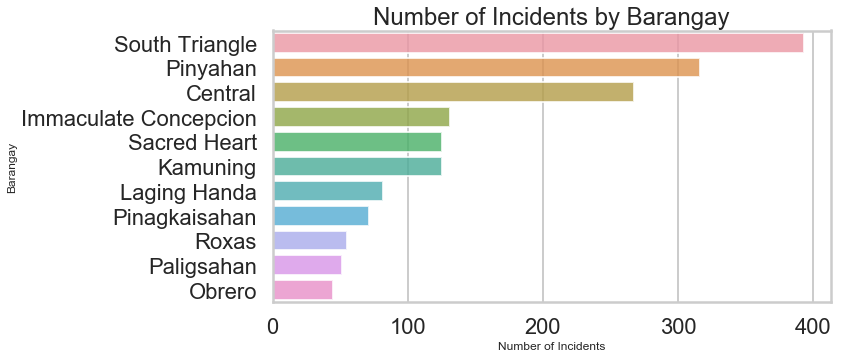

In [274]:
brgy  = crimereport['barangay'].value_counts()
brgy = brgy[:11,]
plt.figure(figsize=(10,5))
ax = sns.barplot(brgy.values, brgy.index, alpha=0.8)
plt.title('Number of Incidents by Barangay')
plt.ylabel('Barangay', fontsize=12)
plt.xlabel('Number of Incidents', fontsize=12)
plt.show()

In [55]:
crimereport['year'].value_counts()

2016    731
2018    467
2017    463
Name: year, dtype: int64

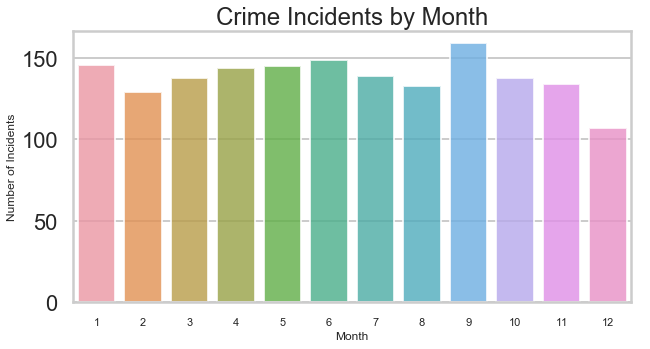

In [95]:
month = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
crimereport['month'] = pd.Categorical(crimereport['month'], ordered=True, categories=month)

plt.figure(figsize=(10,5))
#sns.lineplot(x="Month",y="",data = df.head(1100),color="BLACK")
#sns.lineplot(x="Month",y="Heat Loss",data = df.head(1100),color ="RED")

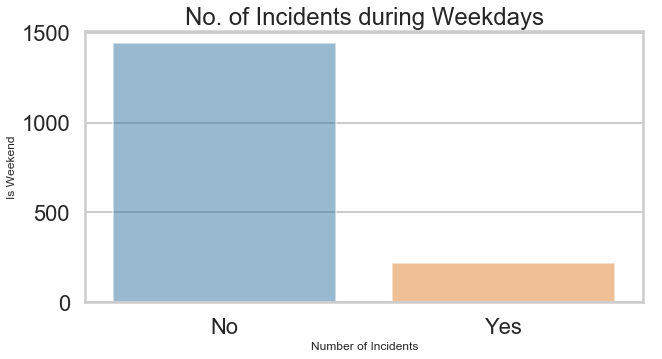

In [53]:
is_wkend  = crimereport['is_weekend'].value_counts()
offense = offense[:2,]
plt.figure(figsize=(10,5))
ax = sns.barplot(is_wkend.index, is_wkend.values, alpha=0.5)
plt.title('No. of Incidents during Weekdays')
plt.ylabel('Is Weekend', fontsize=12)
plt.xlabel('Number of Incidents', fontsize=12)
plt.show()

In [86]:
df = pd.read_excel('CrimeReport.xlsx')

In [87]:
df.head(10)

,barangay,street,date_committed,time_committed,offense,crime_category,year,month,day_of_week,hour,is_weekend,minute
0,Kamuning,K-5TH ST.,2017-01-01,04:00:00,PHYSICAL INJURIES,PERSONS,2017,1,6,0,Yes,0
1,Central,EAST AVE.,2017-01-04,14:05:00,PHYSICAL INJURIES,PERSONS,2017,1,2,5,No,5
2,Central,ELLIPTICAL RD.,2017-01-05,00:00:00,THEFT,PROPERTY,2017,1,3,0,No,0
3,Central,ELLIPTICAL RD.,2017-01-05,19:00:00,ROBBERY,PROPERTY,2017,1,3,0,No,0
4,Pinyahan,EDSA,2017-01-08,15:00:00,ROBBERY,PROPERTY,2017,1,6,0,Yes,0
5,Pinyahan,EAST AVE.,2017-01-05,13:30:00,ROBBERY,PROPERTY,2017,1,3,30,No,30
6,South Triangle,PANAY AVE.,2017-01-09,03:40:00,PHYSICAL INJURIES,PERSONS,2017,1,0,40,No,40
7,Pinyahan,MAGALANG ST.,2017-01-11,00:00:00,PHYSICAL INJURIES,PERSONS,2017,1,2,0,No,0
8,Paligsahan,TIMOG AVE.,2017-01-11,18:30:00,THEFT,PROPERTY,2017,1,2,30,No,30
9,Sacred Heart,TOMAS MORATO AVE.,2017-01-13,03:00:00,PHYSICAL INJURIES,PERSONS,2017,1,4,0,No,0
